In [75]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [76]:
!ls bank-add*

bank-additional.csv

bank-additional:
bank-additional-full.csv  bank-additional-names.txt


In [77]:
data = pd.read_csv('bank-additional.csv', header=0,sep=';')

In [78]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [79]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [80]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [81]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [82]:
data.shape

(4119, 21)

### EDA

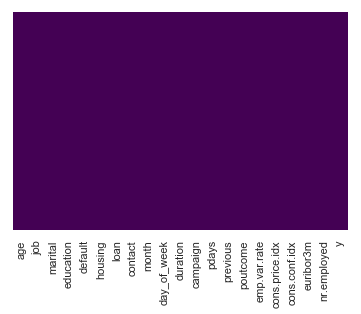

In [83]:
# check for any missing values
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It seems that we do not have any missing values

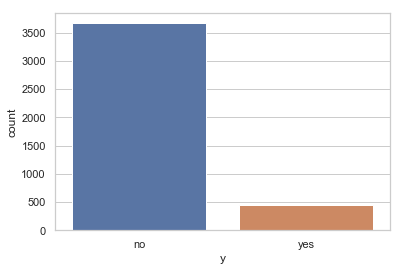

In [84]:
sns.countplot(x='y',data=data)
plt.show()

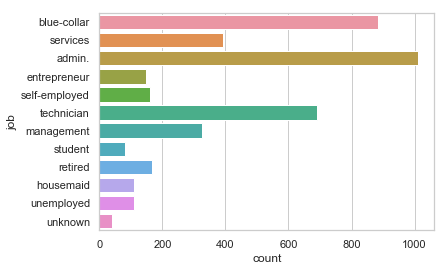

In [85]:
#Customer job description
sns.countplot(y="job", data=data)
plt.show()

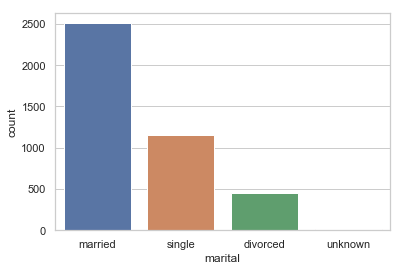

In [86]:
#Customer marital status
sns.countplot(x="marital", data=data)

In [87]:
data['marital'][data['marital']=="unknown"]=data['marital'].mode()[0]

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


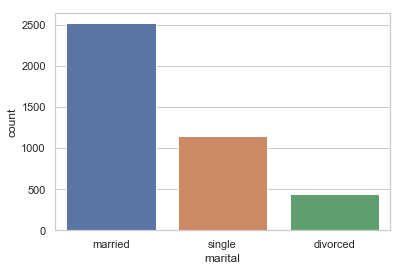

In [88]:
#Customer marital status after imputing values
sns.countplot(x="marital", data=data)

In [89]:
data.marital.value_counts()

married     2520
single      1153
divorced     446
Name: marital, dtype: int64

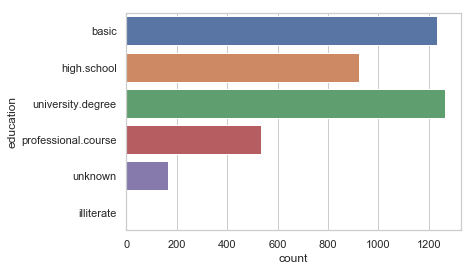

In [90]:
sns.countplot(y='education', data=data)

In [91]:
data['education'][data['education']=="unknown"]=data['education'].mode()[0]

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


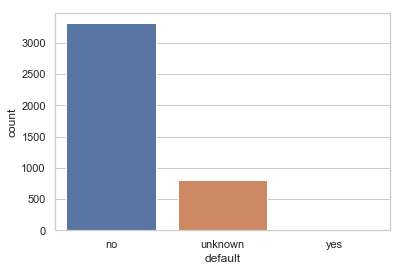

In [92]:
#credit in default
sns.countplot(x="default", data=data)

In [93]:
print(data.default.value_counts())
data['default'][data['default']=="unknown"]=data['default'].mode()[0]
print('-----------------------')
print('After imputing......')
print('----------------------')
print(data.default.value_counts())

no         3315
unknown     803
yes           1
Name: default, dtype: int64
-----------------------
After imputing......
----------------------
no     4118
yes       1
Name: default, dtype: int64


/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


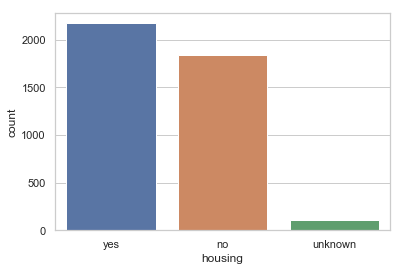

In [94]:
# Housing loan plot
sns.countplot(x="housing", data=data)

In [95]:
print(data.housing.value_counts())
data['housing'][data['housing']=="unknown"]=data['housing'].mode()[0]
print('--------------------------------')
print('After imputing......')
print('--------------------------------')
print(data.housing.value_counts())

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64
--------------------------------
After imputing......
--------------------------------
yes    2280
no     1839
Name: housing, dtype: int64


/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


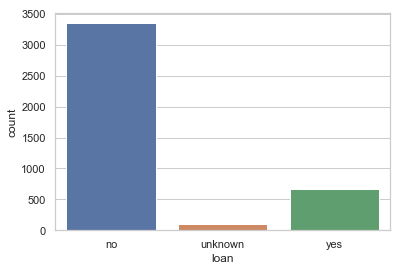

In [96]:
# plot for personal loan
sns.countplot(x="loan", data=data)

In [97]:
data['loan'][data['loan']=="unknown"]=data['loan'].mode()[0]


/Users/suniljacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


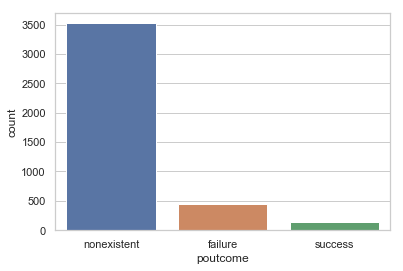

In [98]:
# previous marketing campaign outcome
sns.countplot(x="poutcome", data=data)

There seems to be lot of unknown values in some of the attributes. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

### Pre Processing

Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [99]:
le = preprocessing.LabelEncoder()

In [100]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [111]:
from sklearn.pipeline import Pipeline
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=['job','marital','education','housing','loan','poutcome','y']))
    # add more pipeline steps as needed
])
data = encoding_pipeline.fit_transform(data)

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/suniljacob/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/suniljacob/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/suniljacob/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

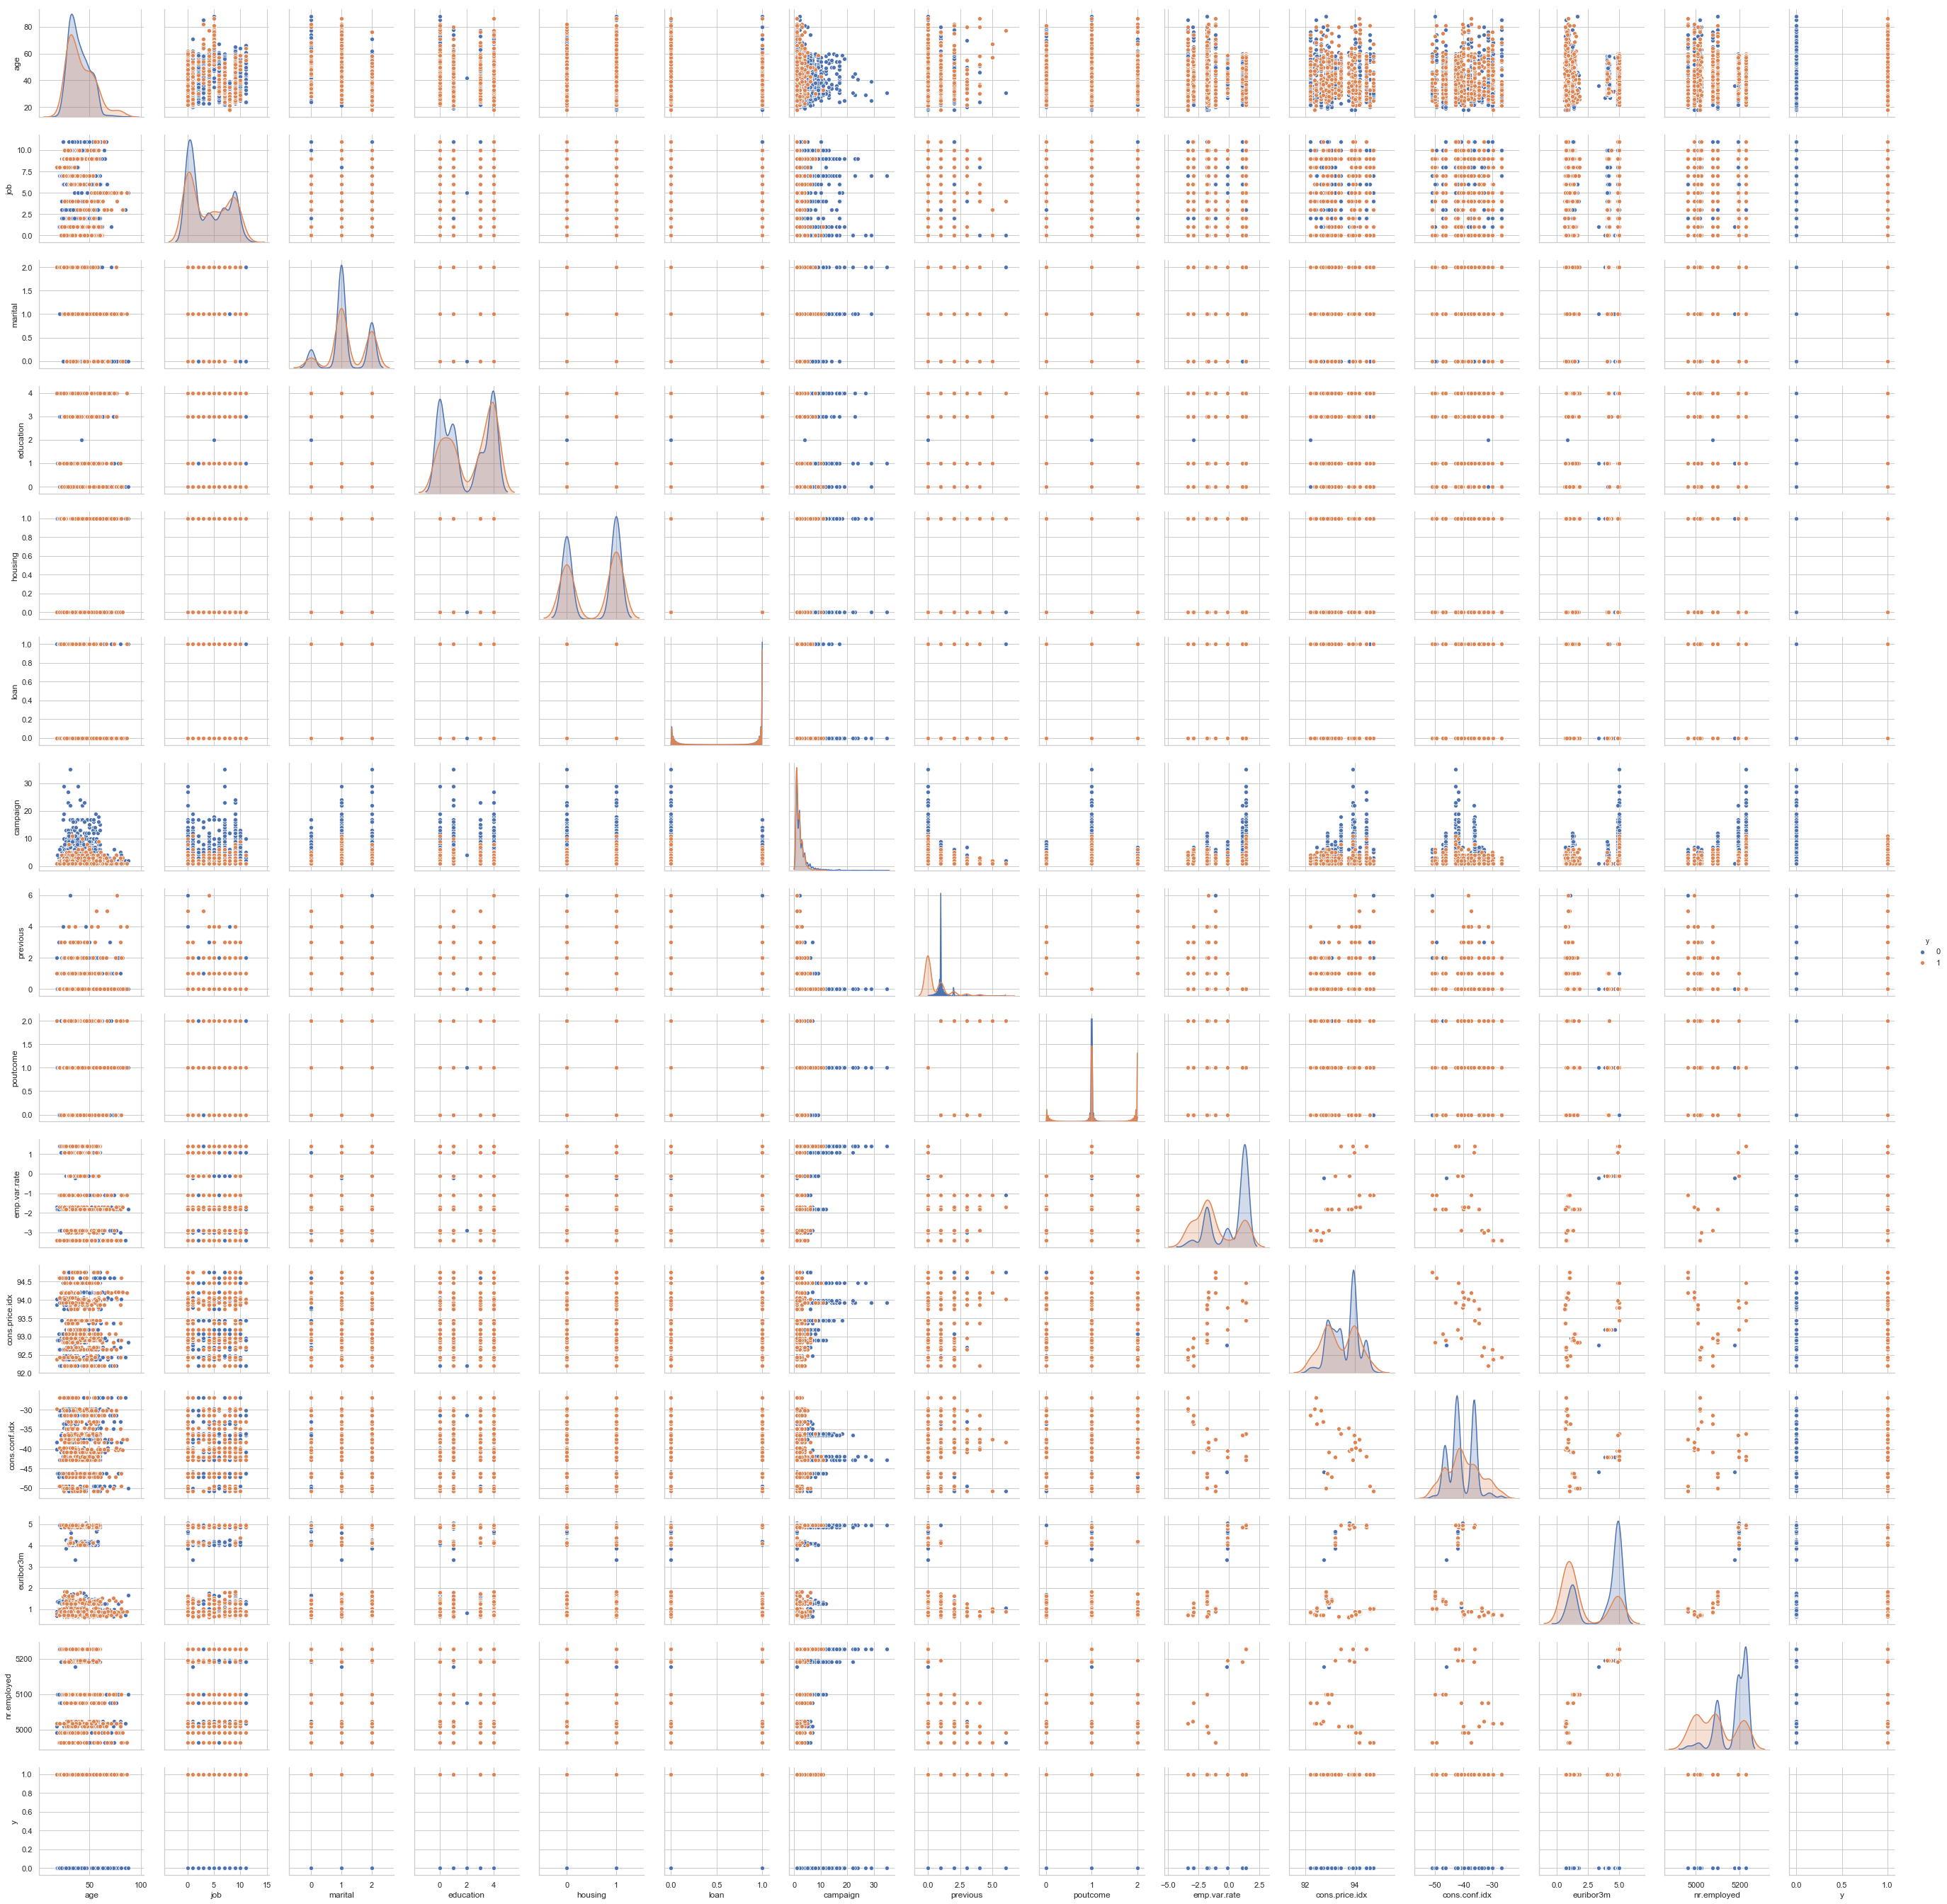

In [112]:
sns.pairplot(data,hue='y')

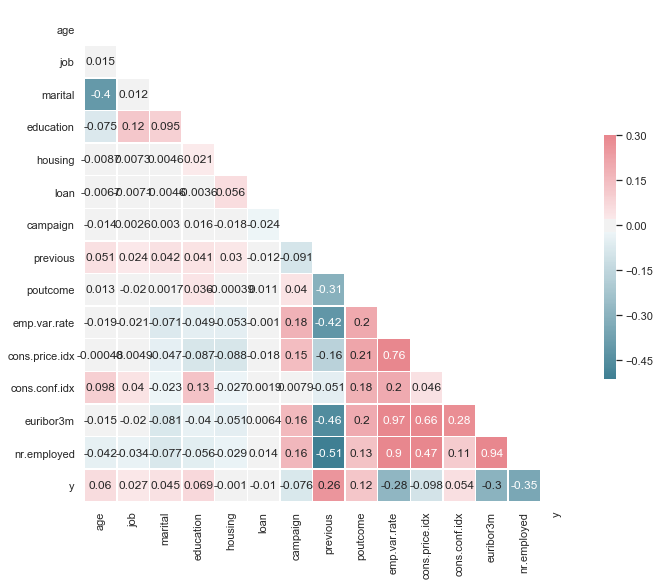

In [113]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [115]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [116]:
data.shape

(4119, 15)

#### Train Test split

In [117]:
data.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,0,1,0,2,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,1,0,0,4,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,1,1,0,1,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,0,1,0,3,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,4,1,0,1,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [118]:
#y=le.fit_transform(y)
X = data.drop(['y'], axis=1)
y = data['y']

In [119]:
print(X.columns)
print(y[0:5])

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


In [120]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

### Train the model

In [121]:
lr=LogisticRegression()

In [122]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
predict = lr.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9053398058252428

In [126]:
print(y_test[0:5])
print('----------------')
print(predict[0:5])

889     1
2669    0
2707    0
2258    0
2514    1
Name: y, dtype: int64
----------------
[0 0 0 0 0]


In [131]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predict).T, index=['No', 'Yes'], columns=['No', 'Yes']) 
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1098,110
Yes,7,21


#### Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0) 
rf.fit(X_train, y_train)

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [135]:
predict = rf.predict(X_test)

In [136]:
accuracy_score(y_test, predict)

0.8996763754045307